In [1]:
import os
folder_pwd = os.getcwd()
os.chdir('..')
os.chdir('../resources')
resources_path = os.getcwd()
os.chdir(folder_pwd)

image_folder = '/test/Images'
csv_folder = '/test/c'

files = os.listdir(resources_path+csv_folder)
csv_file = []
for f in files:
    csv_file.append(f)

csv_file

['Batch10.csv - TEST.csv', 'Batch11.csv TEST.csv', 'Batch9.csv - TEST.csv']

In [2]:
%%time
from csv import reader
import pandas as pd
import numpy as np

def read_csv(file_name):
    return pd.read_csv(resources_path+csv_folder+'/'+file_name, names=['type','from_x','from_y','width', 'height', 'name', 'full_width', 'full_height'])

df = pd.DataFrame()
for f in csv_file:
    df = df.append(read_csv(f)).reset_index(drop=True)
df

Wall time: 1.06 s


,type,from_x,from_y,width,height,name,full_width,full_height
0,Head,401,218,199,178,20170_2021-02-17_23.26_231242218.png,800,480
1,Head,414,190,194,173,20170_2021-02-17_23.26_23155437.png,800,480
2,Spine,360,121,165,76,20176_2021-02-18_14.12_1478842.png,800,480
3,Head,353,157,200,169,20180_2021-02-14_10.40_103946538.png,800,480
4,Head,429,141,133,125,20185_2021-02-19_14.07_14130658.png,800,480
...,...,...,...,...,...,...,...,...
432,Head,310,106,88,86,21273_2021-04-26_20.02_195224108.png,800,480
433,Hands,421,124,36,24,21273_2021-04-26_20.02_195224108.png,800,480
434,Head,256,101,109,102,21273_2021-04-26_20.13_20739369.png,800,480
435,Head,329,129,92,88,21277_2021-04-27_20.23_201955591.png,800,480


In [3]:
print(df['type'].unique())
df = df.rename(columns={'from_x':'from_y', 'from_y':'from_x'})
df = df.replace({'Head ':'head','Head':'head','Arms':'arm','Spine ':'spine','Legs':'leg','Feet':'foot','Spine':'spine', 'Hands':'hand'})
print(df['type'].unique(),'\n' ,df.groupby('type').count()['from_x'])
df

['Head ' 'Spine' 'Arms' 'Hands' 'Legs' 'Head']
['head' 'spine' 'arm' 'hand' 'leg'] 
 type
arm        7
hand      11
head     343
leg        2
spine     74
Name: from_x, dtype: int64


,type,from_y,from_x,width,height,name,full_width,full_height
0,head,401,218,199,178,20170_2021-02-17_23.26_231242218.png,800,480
1,head,414,190,194,173,20170_2021-02-17_23.26_23155437.png,800,480
2,spine,360,121,165,76,20176_2021-02-18_14.12_1478842.png,800,480
3,head,353,157,200,169,20180_2021-02-14_10.40_103946538.png,800,480
4,head,429,141,133,125,20185_2021-02-19_14.07_14130658.png,800,480
...,...,...,...,...,...,...,...,...
432,head,310,106,88,86,21273_2021-04-26_20.02_195224108.png,800,480
433,hand,421,124,36,24,21273_2021-04-26_20.02_195224108.png,800,480
434,head,256,101,109,102,21273_2021-04-26_20.13_20739369.png,800,480
435,head,329,129,92,88,21277_2021-04-27_20.23_201955591.png,800,480


In [4]:
images_to_check =df['name'].unique()
images_to_check.shape

(370,)

In [5]:
%%time

import os, random, cv2, Classify
import numpy as np

# 1. Load models
classifiers = Classify.load_svm(resources_path + '/SVM')
print(classifiers)

{'head': SVC(probability=True), 'spine': SVC(probability=True), 'leg': SVC(probability=True), 'arm': SVC(probability=True), 'foot': SVC(probability=True), 'hand': SVC(probability=True)}
Wall time: 13.6 s


In [ ]:
%%time
import time

def analyse(image):
    print(image, end=' ')

    img = cv2.imread(resources_path+image_folder+'/'+image, 0)

    start = time.time()

    feat_image, result, pred = Classify.analyse_image(img, classifiers,  crop_thresh=0.2, blur_size=10, bright_strength=1, sharp_strength=1,
                                   square_step=True, windows=[(64, 64), (96, 96), (128, 128), (192, 192)], window_stride=16, pred_threshold = 0.99)

    end = time.time()
    result['time_in_s'] = end-start
    result['name'] = image
    result.to_csv(resources_path+'/test/res/'+image[0:-4]+'.csv', index=False)

for im in images_to_check:
    analyse(im)


20170_2021-02-17_23.26_231242218.png 20170_2021-02-17_23.26_23155437.png 20176_2021-02-18_14.12_1478842.png 20180_2021-02-14_10.40_103946538.png 20185_2021-02-19_14.07_14130658.png 20186_2021-02-12_22.57_225352141.png 20201_2021-02-19_18.44_18403919.png 20208_2021-05-01_20.13_20851214.png 20226_2021-02-14_18.30_18307775.png 20245_2021-02-12_21.45_213616348.png 20256_2021-02-26_18.29_18205356.png 20260_2021-02-15_21.29_212615172.png 20275_2021-02-17_20.18_2013357.png 20275_2021-02-21_18.33_183014957.png 20297_2021-02-26_18.53_185112443.png 

In [89]:
import ast

files = os.listdir(resources_path+'/test/res')
csv_file = []
for f in files:
    csv_file.append(pd.read_csv(resources_path+'/test/res/'+f))

results = pd.concat(csv_file)
results[["x", "y"]] = results[["x", "y"]].apply(pd.to_numeric, downcast='integer')
results['window_size'] = results['window_size'].apply(ast.literal_eval)

In [90]:
import ast

results1 = results.rename(columns={'highest': 'type'}).drop(columns=['hog', 'window'])
results1 = pd.merge(df, results1, on=['name', 'type'], how='outer')

results1 = results1.drop(columns=['full_width', 'full_height', 'head', 'spine', 'leg', 'hand', 'arm' , 'foot'])

In [94]:
from Classify import iou_value

def iou(row):
    if row.isnull().values.any():
        return 0
    c, c1 = row[['from_x','from_y']], row[['x','y']]
    boxA = [c[0], c[1], c[0]+row['width'], c[1]+row['height']]
    boxB = [c1[0], c1[1], c1[0]+row['window_size'][0], c1[1]+row['window_size'][1]]
    return iou_value(boxA, boxB, boxes=True)

results1.loc[:,'iou'] = results1.apply(iou, axis=1)
results1.loc[results1['iou']>=0.5,'prediction'] = 'tp'
results1.loc[results1['iou']<0.5,'prediction'] = 'fp_found'
results1.loc[results1['from_y'].isna(), 'prediction'] = 'fp'
results1.loc[results1['x'].isna(), 'prediction'] = 'fn'

results1.groupby(by='prediction').count()

,type,from_y,from_x,width,height,name,x,y,window_size,highest_pred,time_in_s,iou
prediction,,,,,,,,,,,,
fn,242,242,242,242,242,242,0,0,0,0,0,242
fp,82,0,0,0,0,82,82,82,82,82,82,82
fp_found,103,103,103,103,103,103,103,103,103,103,103,103
tp,92,92,92,92,92,92,92,92,92,92,92,92


In [80]:
import cv2

def extract_subsection1(row):
    if row['from_x'] != row['from_x']:
        return np.nan
    img = cv2.imread(resources_path+image_folder+'/'+row['name'], 0)
    
    if img is None:
        return np.nan
    
    subsect = img[int(row['from_x']):int(row['from_x']+row['width']), int(row['from_y']):int(row['from_y']+row['height'])]
    # In case the crop was near an edge, creating the square could make it go outside image
    if subsect.shape[0] != subsect.shape[1]:
        diff = subsect.shape[0] - subsect.shape[1]
        if diff<0:
            subsect = np.pad(subsect, ((0, abs(diff)),(0,0)),constant_values=0)
        else:
            subsect = np.pad(subsect, ((0, 0),(0, abs(diff))),constant_values=0)
    subsect = cv2.resize(subsect, (128, 128))
    return subsect

def extract_subsection(row):
    if row['x'] != row['x']:
        return np.nan
    img = cv2.imread(resources_path+image_folder+'/'+row['name'], 0)
    
    if img is None:
        return np.nan
    subsect = img[int(row['x']):int(row['x']+row['window_size'][0]), int(row['y']):int(row['y']+row['window_size'][0])]
    # In case the crop was near an edge, creating the square could make it go outside image
    if subsect.shape[0] != subsect.shape[1]:
        diff = subsect.shape[0] - subsect.shape[1]
        if diff<0:
            subsect = np.pad(subsect, ((0, abs(diff)),(0,0)),constant_values=0)
        else:
            subsect = np.pad(subsect, ((0, 0),(0, abs(diff))),constant_values=0)
    subsect = cv2.resize(subsect, (128, 128))
    return subsect

t = results1.copy(deep=True)
t['subsection_me'] = t.apply(extract_subsection, axis=1)
t['subsection_test'] = t.apply(extract_subsection1, axis=1)


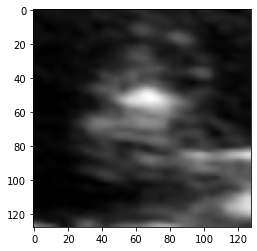

In [87]:
from matplotlib import pyplot as plt

q = t[t['prediction']=='fp']

plt.imshow(q['subsection_me'].iloc[3], cmap='gray')

,type,from_y,from_x,width,height,name,x,y,window_size,highest_pred,time_in_s,iou,prediction,subsection_me,subsection_test
437,spine,NaN,NaN,NaN,NaN,20349_2021-02-16_18.26_18264781.png,176.0,194.0,"(192, 192)",0.960538,5.311248,0.0,fp,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NaN
438,hand,NaN,NaN,NaN,NaN,20275_2021-02-17_20.18_2013357.png,304.0,384.0,"(64, 64)",0.971731,4.684350,0.0,fp,"[[97, 95, 92, 87, 82, 77, 73, 69, 65, 61, 56, ...",NaN
439,spine,NaN,NaN,NaN,NaN,20226_2021-02-14_18.30_18307775.png,304.0,193.0,"(96, 96)",0.991826,4.238309,0.0,fp,"[[74, 75, 74, 71, 69, 69, 71, 73, 75, 72, 70, ...",NaN
440,hand,NaN,NaN,NaN,NaN,20226_2021-02-14_18.30_18307775.png,176.0,321.0,"(64, 64)",0.958640,4.238309,0.0,fp,"[[9, 10, 11, 13, 14, 15, 16, 16, 16, 16, 17, 1...",NaN
